In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets.samples_generator import make_blobs
from sklearn. preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report, f1_score, precision_recall_curve
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, roc_auc_score,auc
from sklearn.feature_selection import VarianceThreshold,mutual_info_classif,mutual_info_regression
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel,SelectKBest,SelectPercentile
from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler 


In [2]:
#loading data file
#dataset https://archive.ics.uci.edu/ml/datasets/Car+Evaluation
fullFileName='C:/Users/SARA/Desktop/D I C/9351/travail pratique 1/dataset/car.data'
data=pd.read_csv(fullFileName, sep=',', header=0)

In [3]:
print("Dataset Lenght:: ",len(data))
#first we count the number of missing values in each row in pandas dataframe
data.isnull().sum(axis=0)

Dataset Lenght::  1727


vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64

In [4]:
print("Dataset shape:: ",data.shape)

Dataset shape::  (1727, 7)


In [5]:
print("Dataset:: ")
data.head()
data.info()
data.describe()

Dataset:: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
vhigh      1727 non-null object
vhigh.1    1727 non-null object
2          1727 non-null object
2.1        1727 non-null object
small      1727 non-null object
low        1727 non-null object
unacc      1727 non-null object
dtypes: object(7)
memory usage: 94.6+ KB


,vhigh,vhigh.1,2,2.1,small,low,unacc
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,low,low,4,4,med,high,unacc
freq,432,432,432,576,576,576,1209


In [6]:
data.columns=['buying','maintainence','doors','persons','Size of Luggage Boot','safety','class']
data.columns.tolist()

['buying',
 'maintainence',
 'doors',
 'persons',
 'Size of Luggage Boot',
 'safety',
 'class']

In [7]:
data.head(1)

,buying,maintainence,doors,persons,Size of Luggage Boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc


In [8]:
data['class'].value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [9]:
data['class'].replace(('unacc','acc','good','vgood'),(4,3,2,1),inplace=True)
data['class'].value_counts()

4    1209
3     384
2      69
1      65
Name: class, dtype: int64

In [10]:
# Label Encoding once more so that we get higher accuracy
# we have 4 classes namely 4,3,2,1
# It would be very beneficial if we combine 4 and 3 as 1 and 2 and 1 as 0
data['class'].replace((4, 3, 2, 1), (1, 1, 0, 0), inplace = True)
data['class'].value_counts()

1    1593
0     134
Name: class, dtype: int64

In [11]:
data['Size of Luggage Boot'].replace(('small', 'med', 'big'), (0, 1, 2), inplace = True)

data['Size of Luggage Boot'].value_counts()

2    576
1    576
0    575
Name: Size of Luggage Boot, dtype: int64

In [12]:
data['safety'].replace(('low', 'med', 'high'), (0, 1, 2), inplace = True)

data['safety'].value_counts()

2    576
1    576
0    575
Name: safety, dtype: int64

In [13]:
data['buying'].replace(('low', 'med', 'high', 'vhigh'), (0, 1, 2, 3), inplace = True)

data['buying'].value_counts()

2    432
1    432
0    432
3    431
Name: buying, dtype: int64

In [14]:
data['maintainence'].replace(('low', 'med', 'high', 'vhigh'), (0, 1, 2, 3), inplace = True)

data['maintainence'].value_counts()

2    432
1    432
0    432
3    431
Name: maintainence, dtype: int64

In [15]:

data['doors'].replace('5more', 5, inplace = True)

data['doors'].value_counts()

4    432
3    432
5    432
2    431
Name: doors, dtype: int64

In [16]:

data['persons'].replace('more', 5, inplace = True)

data['persons'].value_counts()

4    576
5    576
2    575
Name: persons, dtype: int64

In [17]:
data.dtypes

buying                   int64
maintainence             int64
doors                   object
persons                 object
Size of Luggage Boot     int64
safety                   int64
class                    int64
dtype: object

In [18]:
#Creating the Source and Target Variables
X = data.iloc[:,0:-1] 
Y = data.iloc[:,-1]

#Spliting Dataset into Test and Train
X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.2, random_state=1)
#Applying Standard scaling to get optimized result
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [19]:
X_train.shape,y_test.shape

((1381, 6), (346,))

In [20]:
#Decision Tree Classifier
#Function to perform training with Entropy
dt=DecisionTreeClassifier(criterion="entropy", random_state=100, max_depth=2, min_samples_leaf=5)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [21]:
# Function to make prediction
y_pred_en=dt.predict(X_test)
#checking performance of the model
print(confusion_matrix(y_test, y_pred_en))
print(classification_report(y_test, y_pred_en))
f1_score(y_test, y_pred_en,average='weighted')

[[  0  34]
 [  0 312]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        34
           1       0.90      1.00      0.95       312

    accuracy                           0.90       346
   macro avg       0.45      0.50      0.47       346
weighted avg       0.81      0.90      0.86       346



C:\Users\SARA\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\SARA\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.855139940615282

In [22]:
#Random Forest Classifier
rfc=RandomForestClassifier(n_estimators=100, max_features=.2)
rfc.fit(X_train, y_train)
predictionRF=rfc.predict(X_test)
#checking performance of the model
print(confusion_matrix(y_test, predictionRF))
print(classification_report(y_test, predictionRF))
f1_score(y_test, predictionRF,average='weighted')


[[ 26   8]
 [  1 311]]
              precision    recall  f1-score   support

           0       0.96      0.76      0.85        34
           1       0.97      1.00      0.99       312

    accuracy                           0.97       346
   macro avg       0.97      0.88      0.92       346
weighted avg       0.97      0.97      0.97       346



0.9726402523643769

In [23]:
#define K
import math
math.sqrt(len(y_test))

18.601075237738275

In [24]:
#K-NN classifier
knn=KNeighborsClassifier(n_neighbors=17, p=2, metric='euclidean')

#predict the test set results
knn.fit(X_train, y_train)
predictionKNN=knn.predict(X_test)
#Evaluate model
print(confusion_matrix(y_test, predictionKNN))
print(classification_report(y_test, predictionKNN))
f1_score(y_test, predictionKNN,average='weighted')

[[ 25   9]
 [  0 312]]
              precision    recall  f1-score   support

           0       1.00      0.74      0.85        34
           1       0.97      1.00      0.99       312

    accuracy                           0.97       346
   macro avg       0.99      0.87      0.92       346
weighted avg       0.97      0.97      0.97       346



0.9721894230193292

In [25]:
# svm Classifier
clf=svm.SVC(kernel="linear", C=1.0)
clf.fit(X_train,y_train)
predictionSVM=clf.predict(X_test)

#Evaluate model
print(confusion_matrix(y_test, predictionSVM))
print(classification_report(y_test, predictionSVM))
f1_score(y_test, predictionSVM,average='weighted')

[[ 24  10]
 [  3 309]]
              precision    recall  f1-score   support

           0       0.89      0.71      0.79        34
           1       0.97      0.99      0.98       312

    accuracy                           0.96       346
   macro avg       0.93      0.85      0.88       346
weighted avg       0.96      0.96      0.96       346



0.9604803645263219

In [26]:
#Bagging Classifier
bg=BaggingClassifier(DecisionTreeClassifier(), max_samples=0.5, max_features=1.0, n_estimators=10)
bg=BaggingClassifier()
bg.fit(X_train,y_train)
predictionbg=bg.predict(X_test)

#Evaluate model
print(confusion_matrix(y_test, predictionbg))
print(classification_report(y_test, predictionbg))
f1_score(y_test, predictionbg,average='weighted')

[[ 31   3]
 [  1 311]]
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        34
           1       0.99      1.00      0.99       312

    accuracy                           0.99       346
   macro avg       0.98      0.95      0.97       346
weighted avg       0.99      0.99      0.99       346



0.9882826118952363

In [27]:
#Boosting Classifier- Ada Boost
adb=AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=10, learning_rate=1)
adb.fit(X_train,y_train)
predictionadb=adb.predict(X_test)

#Evaluate model
print(confusion_matrix(y_test, predictionadb))
print(classification_report(y_test, predictionadb))
f1_score(y_test, predictionadb,average='weighted')

[[ 32   2]
 [  0 312]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        34
           1       0.99      1.00      1.00       312

    accuracy                           0.99       346
   macro avg       1.00      0.97      0.98       346
weighted avg       0.99      0.99      0.99       346



0.9941413059476182

In [28]:
#Naive bayse Classifier
nb=GaussianNB()
nb.fit(X_train,y_train)
predictionnb=nb.predict(X_test)

#Evaluate model
print(confusion_matrix(y_test, predictionnb))
print(classification_report(y_test, predictionnb))
f1_score(y_test, predictionnb,average='weighted')

[[ 22  12]
 [  2 310]]
              precision    recall  f1-score   support

           0       0.92      0.65      0.76        34
           1       0.96      0.99      0.98       312

    accuracy                           0.96       346
   macro avg       0.94      0.82      0.87       346
weighted avg       0.96      0.96      0.96       346



0.956368536251194

In [29]:
#creat Multilayer neural network Classifier
nn=MLPClassifier(activation='logistic', solver='sgd',hidden_layer_sizes=(10,15), random_state=1)
nn.fit(X_train,y_train)
predictionNN=nn.predict(X_test)

#Evaluate model
print(confusion_matrix(y_test, predictionNN))
print(classification_report(y_test, predictionNN))
f1_score(y_test, predictionNN,average='weighted')


[[  0  34]
 [  0 312]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        34
           1       0.90      1.00      0.95       312

    accuracy                           0.90       346
   macro avg       0.45      0.50      0.47       346
weighted avg       0.81      0.90      0.86       346



C:\Users\SARA\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\SARA\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.855139940615282

In [30]:
#Voting Classifier- Multiple Model Ensemble
evc=VotingClassifier(estimators=[('dt',dt),('rfc',rfc),('clf',clf),('knn',knn),('bg',bg),('adb',adb),('nb',nb),('nn',nn)], voting='hard')
evc.fit(X_train,y_train)
predictionevc=evc.predict(X_test)

#Evaluate model
print(confusion_matrix(y_test, predictionevc))
print(classification_report(y_test, predictionevc))
f1_score(y_test, predictionevc,average='weighted')

[[ 26   8]
 [  0 312]]
              precision    recall  f1-score   support

           0       1.00      0.76      0.87        34
           1       0.97      1.00      0.99       312

    accuracy                           0.98       346
   macro avg       0.99      0.88      0.93       346
weighted avg       0.98      0.98      0.98       346



0.9754835247920781

In [31]:
#defining learning classifiers
names=["Decision_Tree", "Random_Forest", "linear_SVM","Nearest_Neighbors","Bagging","AdaBoost","Naive_Bayes","Neural_Net","Vothing_classifier"]
classifiers = [dt,rfc,clf,knn,bg,adb,nb,nn,evc]

In [32]:
#Build Model, Apply Model on Test Data & Record Accuracy Scores
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    prediction=clf.predict(X_test)
    score=f1_score(y_test, prediction,average='weighted')
    scores.append(score)

C:\Users\SARA\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\SARA\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [33]:
scores

[0.855139940615282,
 0.9758699377569414,
 0.9604803645263219,
 0.9721894230193292,
 0.9941413059476182,
 0.9941413059476182,
 0.956368536251194,
 0.855139940615282,
 0.978720196283404]

In [45]:
#create data frame of model performance
df = pd.DataFrame()
df['Machine Learning algorithms'] = names
df['F-measure of Car Evaluation'] = scores 


In [46]:
#adding colors to the data frame
cm = sns.light_palette("purple", as_cmap=True)
s = df.style.background_gradient(cmap=cm)
s

,Machine Learning algorithms,F-measure of Car Evaluation
0,Decision_Tree,0.85514
1,Random_Forest,0.97587
2,linear_SVM,0.96048
3,Nearest_Neighbors,0.972189
4,Bagging,0.994141
5,AdaBoost,0.994141
6,Naive_Bayes,0.956369
7,Neural_Net,0.85514
8,Vothing_classifier,0.97872


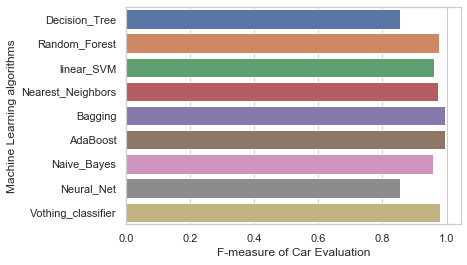

In [47]:
#Bar plot of model performance
sns.set(style="whitegrid")
ax = sns.barplot(y="Machine Learning algorithms", x="F-measure of Car Evaluation", data=df)
